In [1]:
import os
import shutil
from tqdm.notebook import tqdm as tqdm
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display
from IPython.display import Image as im
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
import cv2
%matplotlib inline

In [2]:
imageName="GoundTruthRGB.jpg"
imagePath=r"C:\\Users\\dsi224\\Documents\\PythonFiles\\PythonCodesForDiffusionModel"  #Use r with \\
imageFullName=os.path.join(imagePath, imageName)
print(imageFullName)
image = cv2.imread(imageFullName, cv2.IMREAD_COLOR)

C:\\Users\\dsi224\\Documents\\PythonFiles\\PythonCodesForDiffusionModel\GoundTruthRGB.jpg


Image type <class 'numpy.ndarray'>
Ground Truth image shape: (2048, 2048, 3)


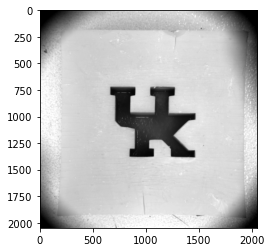

In [3]:
print('Image type',type(image))
imageShape=image.shape
print('Ground Truth image shape:',imageShape)
plt.imshow(image)
plt.show()

Test Shape: (2048, 1024, 3) Train Shape: (2048, 1024, 3)


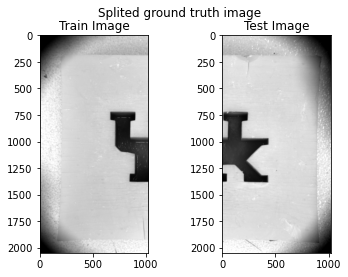

In [4]:
#imageDelta=9;
imageTrain=image[:,:int(imageShape[1]/2),:]
imageTest=image[:,int(imageShape[1]/2):,:]
print('Test Shape:',imageTest.shape, 'Train Shape:',imageTrain.shape)
fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(cv2.cvtColor(imageTrain, cv2.COLOR_BGR2RGB))
axs[0].set_title('Train Image')
axs[1].imshow(cv2.cvtColor(imageTest, cv2.COLOR_BGR2RGB))
axs[1].set_title('Test Image')
fig.suptitle('Splited ground truth image')
plt.show()

In [5]:
# Creating a directory
directoryName_1='Dir_'
directoryName_2=imageName[:-4]+'ForDDPM_Test'
directoryName=directoryName_1+directoryName_2
print(directoryName)
directoryFullName=os.path.join(imagePath, directoryName)
if not os.path.exists(directoryFullName):
    os.makedirs(directoryFullName)
else:
    shutil.rmtree(directoryFullName)           # Removes all the subdirectories!
    os.makedirs(directoryFullName)

Dir_GoundTruthRGBForDDPM_Test


In [6]:
imageType='.jpg'
CWD=r"C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel"
directoryPath=os.path.join(CWD, directoryName)

imageTestX,imageTestY,_=imageTest.shape
imageType='.jpg'

In [7]:
PixelsX=64
deltaX=64
PixelsY=64
deltaY=64

for x in range(0,imageTestX,deltaX):
    for y in range(0,imageTestY,deltaY):
        smallImage=imageTest[x:x+PixelsX,y:y+PixelsY]
        smallImageName='x_'+str(x)+'_y_'+str(y)+'_'
        imageName=os.path.join(directoryPath, (smallImageName+imageType))
        cv2.imwrite(imageName, smallImage)

Now, we will test to see if the code works for re-attaching the parts of the image together

In [8]:
files = os.listdir(directoryPath)
files = [f for f in files if os.path.isfile(directoryPath+'/'+f)]
files = [f for f in files if f.endswith('.jpg')]
len(files)

512

In [9]:
emptyImage=np.zeros((2048, 1024, 3))
emptyImage.shape

(2048, 1024, 3)

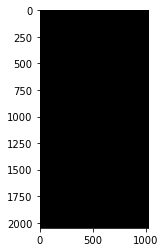

In [10]:
plt.imshow(emptyImage);

x_0_y_0_.jpg
(64, 64, 3)


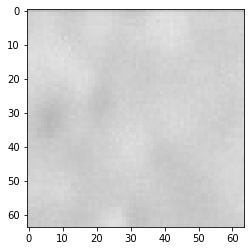

In [11]:
image_name=files[0]
print(image_name)
imageFullName=os.path.join(directoryPath, image_name)
image = (cv2.imread(imageFullName, cv2.IMREAD_COLOR))/255.0
print(image.shape)
plt.imshow(image)
plt.show()

In [12]:
split=image_name.split("_")
split

['x', '0', 'y', '0', '.jpg']

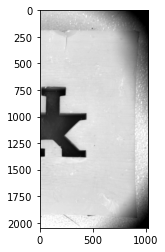

In [13]:
for image_name in files:
    imageFullName=os.path.join(directoryPath, image_name)
    image = (cv2.imread(imageFullName, cv2.IMREAD_COLOR))/255.0
    split=image_name.split("_")
    x=int(split[1])
    y=int(split[3])
    emptyImage[x:x+64,y:y+64]=image
plt.imshow(emptyImage);
plt.show()

NameError: name 'torch' is not defined